<h1 align='center'> Desafio Técnico Junior Data Scientist - Prefeitura do Rio de Janeiro </h1>

In [2]:
# Instala pacotes necessários
!pip install basedosdados pandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 916.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.2/135.2 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.9/70.9 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━

In [3]:
# Carrega na memoria pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import basedosdados as bd

In [4]:
# id do seu projeto, tutorial de como criar em https://docs.dados.rio/tutoriais/como-acessar-dados
project_id = "desafio-datario"

<br><h3>1. Quantos chamados foram abertos no dia 01/04/2023?</h3>

In [56]:
sql = '''
      SELECT Count(*) AS total_chamados
      FROM `datario.administracao_servicos_publicos.chamado_1746`
      WHERE DATE(data_inicio) = '2023-04-01'
        AND data_particao = "2023-04-01";
'''

df = bd.read_sql(sql,billing_project_id=project_id)

print("\n\nForam abertos {} chamados no dia 01/04/2023.".format(int(df["total_chamados"])))

Downloading: 100%|██████████| 1/1 [00:00<00:00,  6.50rows/s]



Foram abertos 73 chamados no dia 01/04/2023.


<br><h3>2. Qual o tipo de chamado que teve mais teve chamados abertos no dia 01/04/2023?</h3>

In [57]:
sql = '''
      SELECT tipo, COUNT(tipo) as Qtd
      FROM `datario.administracao_servicos_publicos.chamado_1746`
      WHERE DATE(data_inicio) = '2023-04-01'
        AND data_particao = "2023-04-01"
      GROUP BY tipo
      ORDER BY 2 DESC
      LIMIT 1;
'''

df = bd.read_sql(sql,billing_project_id=project_id)

print("\n\n{} foi o tipo de chamado que teve mais solicitações de abertura, com {} ocorrências.".format(str(df["tipo"][0]), int(df["Qtd"])))

Downloading: 100%|██████████| 1/1 [00:00<00:00,  7.27rows/s]



Poluição sonora foi o tipo de chamado que teve mais solicitações de abertura, com 24 ocorrências.


<br><h3>3. Quais os nomes dos 3 bairros que mais tiveram chamados abertos nesse dia?</h3>

Downloading: 100%|██████████| 3/3 [00:00<00:00, 20.84rows/s]


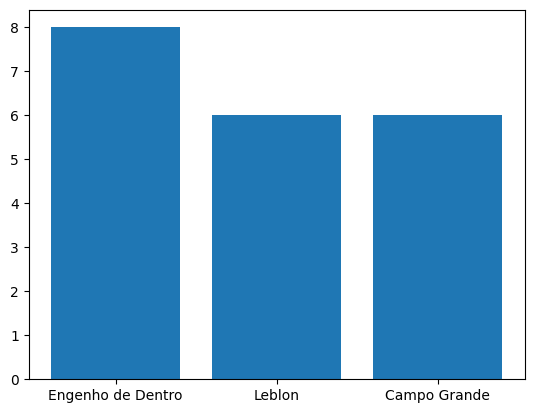

In [58]:
sql = '''
      SELECT b.nome as nome_bairro, COUNT(b.nome) as qtd_chamados
      FROM `datario.administracao_servicos_publicos.chamado_1746` c
      LEFT JOIN `datario.dados_mestres.bairro` b
      ON c.id_bairro = b.id_bairro
      WHERE DATE(c.data_inicio) = '2023-04-01'
        AND c.data_particao = "2023-04-01"
      GROUP BY b.nome
      ORDER BY 2 DESC
      LIMIT 3;
'''

df = bd.read_sql(sql,billing_project_id=project_id)

plt.bar(df['nome_bairro'],df['qtd_chamados'])
plt.show()

<br><h3>4. Qual o nome da subprefeitura com mais chamados abertos nesse dia?</h3>

In [59]:
sql = '''
      SELECT b.subprefeitura, COUNT(b.subprefeitura) as qtd_chamados
      FROM `datario.administracao_servicos_publicos.chamado_1746` c
      LEFT JOIN `datario.dados_mestres.bairro` b
      ON c.id_bairro = b.id_bairro
      WHERE DATE(c.data_inicio) = '2023-04-01'
        AND c.data_particao = "2023-04-01"
      GROUP BY b.subprefeitura
      ORDER BY 2 DESC
      LIMIT 1;
'''

df = bd.read_sql(sql,billing_project_id=project_id)

print("\n\n{} foi a subprefeitura que teve mais solicitações de abertura, com {} ocorrências.".format(str(df["subprefeitura"][0]), int(df["qtd_chamados"])))

Downloading: 100%|██████████| 1/1 [00:00<00:00,  7.71rows/s]



Zona Norte foi a subprefeitura que teve mais solicitações de abertura, com 25 ocorrências.


<br><h3>5. Existe algum chamado aberto nesse dia que não foi associado a um bairro ou subprefeitura na tabela de bairros? Se sim, por que isso acontece?</h3>

In [60]:
sql = '''
      SELECT COUNT(*) as qtd
      FROM `datario.administracao_servicos_publicos.chamado_1746` c
      LEFT JOIN `datario.dados_mestres.bairro` b
      ON c.id_bairro = b.id_bairro
      WHERE DATE(c.data_inicio) = '2023-04-01'
          AND c.data_particao = "2023-04-01"
          AND (c.id_bairro IS NULL
            OR b.subprefeitura IS NULL);
'''

df = bd.read_sql(sql,billing_project_id=project_id)

print("\n\nOuve {} chamado(s) sem informações de localização.".format(int(df["qtd"])))

Downloading: 100%|██████████| 1/1 [00:00<00:00,  7.25rows/s]



Ouve 1 chamado(s) sem informações de localização.


Downloading: 100%|██████████| 2/2 [00:00<00:00, 15.53rows/s]



 Após uma breve análise, conclui-se que grande parte dos chamados que não tem informações de localização estão com a situação 'encerrado',
a possibilidade de que ao finalizar o chamado não esteja colocando informações de localização como bairro.



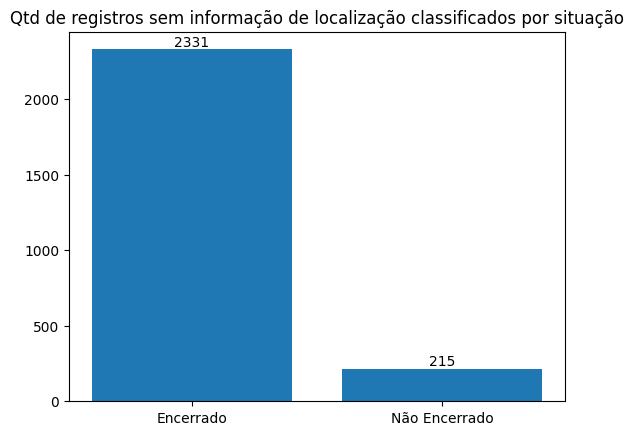

In [61]:
sql = '''
      SELECT situacao, count(situacao) AS qtd
      FROM `datario.administracao_servicos_publicos.chamado_1746`
      WHERE data_particao = "2023-04-01"
          AND id_bairro IS NULL
      GROUP BY situacao;
'''

df = bd.read_sql(sql,billing_project_id=project_id)

print("\n Após uma breve análise, conclui-se que grande parte dos chamados que não tem informações de localização estão com a situação 'encerrado',\na possibilidade de que ao finalizar o chamado não esteja colocando informações de localização como bairro.\n")

fig, ax = plt.subplots()
bar_container = ax.bar(df['situacao'],df['qtd'])
ax.set(title='Qtd de registros sem informação de localização classificados por situação')
ax.bar_label(bar_container)
plt.show()

<br><h3>6. Quantos chamados com o subtipo "Perturbação do sossego" foram abertos desde 01/01/2022 até 31/12/2023 (incluindo extremidades)?</h3>

In [62]:
sql = '''
      SELECT Count(*)
      FROM `datario.administracao_servicos_publicos.chamado_1746`
      WHERE data_particao BETWEEN "2022-01-01" AND "2023-12-01"
          AND subtipo = "Perturbação do sossego";
'''

df = bd.read_sql(sql,billing_project_id=project_id)


Downloading: 100%|██████████| 1/1 [00:00<00:00,  8.42rows/s]


<br><h3>7. Selecione os chamados com esse subtipo que foram abertos durante os eventos contidos na tabela de eventos (Reveillon, Carnaval e Rock in Rio).</h3>

In [63]:
sql = '''
      SELECT Count(*) AS qtd_chamados_abertos
      FROM `datario.administracao_servicos_publicos.chamado_1746` c
      JOIN `datario.turismo_fluxo_visitantes.rede_hoteleira_ocupacao_eventos` e
      ON DATE(c.data_inicio) BETWEEN e.data_inicial AND e.data_final
      WHERE data_particao BETWEEN "2022-01-01" AND "2023-12-01"
          AND subtipo = "Perturbação do sossego";
'''

df = bd.read_sql(sql,billing_project_id=project_id)

print("\n\n Foi selecionado os chamados que foram abertos, e a soma de chamados abertos nos eventos é de {}.".format(int(df['qtd_chamados_abertos'])))

Downloading: 100%|██████████| 1/1 [00:00<00:00,  5.79rows/s]



 Foi selecionado os chamados que foram abertos, e a soma de chamados abertos nos eventos é de 1212.


<br><h3>8. Quantos chamados desse subtipo foram abertos em cada evento?</h3>

Downloading: 100%|██████████| 3/3 [00:00<00:00, 26.80rows/s]


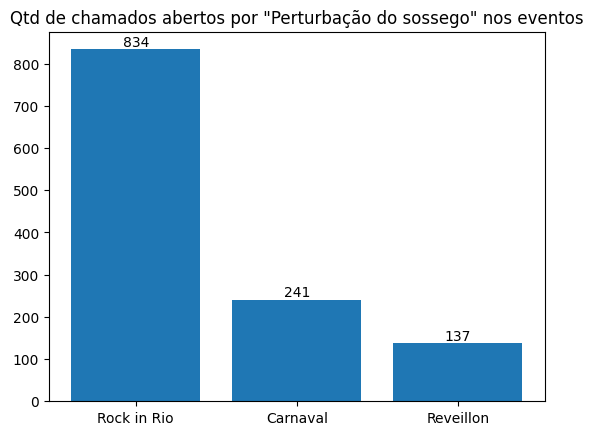

In [64]:
sql = '''
      SELECT e.evento, Count(*) AS qtd_chamados_abertos
      FROM `datario.administracao_servicos_publicos.chamado_1746` c
      JOIN `datario.turismo_fluxo_visitantes.rede_hoteleira_ocupacao_eventos` e
      ON DATE(c.data_inicio) BETWEEN e.data_inicial AND e.data_final
      WHERE data_particao BETWEEN "2022-01-01" AND "2023-12-01"
          AND subtipo = "Perturbação do sossego"
      GROUP BY e.evento
      ORDER BY 2 DESC;
'''

df = bd.read_sql(sql,billing_project_id=project_id)

fig, ax = plt.subplots()
bar_container = ax.bar(df['evento'], df['qtd_chamados_abertos'])
ax.set(title='Qtd de chamados abertos por "Perturbação do sossego" nos eventos')
ax.bar_label(bar_container)
plt.show()

<br><h3>9. Qual evento teve a maior média diária de chamados abertos desse subtipo?</h3>

Downloading: 100%|██████████| 3/3 [00:00<00:00, 19.89rows/s]



Rock in Rio, com uma media diaria de aproximadamente 119 chamados abertos com o subtipo 'Perturbação do sossego'.



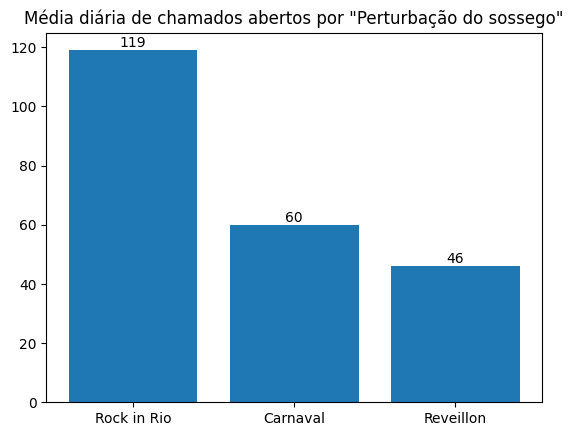

In [65]:
sql = '''
      SELECT evento, ROUND(AVG(qtd_chamados_abertos)) AS media_diaria
      FROM (
            SELECT DATE(c.data_inicio), e.evento, Count(*) AS qtd_chamados_abertos
            FROM `datario.administracao_servicos_publicos.chamado_1746` c
            JOIN `datario.turismo_fluxo_visitantes.rede_hoteleira_ocupacao_eventos` e
            ON DATE(c.data_inicio) BETWEEN e.data_inicial AND e.data_final
            WHERE data_particao BETWEEN "2022-01-01" AND "2023-12-01"
                AND subtipo = "Perturbação do sossego"
            GROUP BY e.evento, DATE(c.data_inicio)
      )
      GROUP BY evento
      ORDER BY 2 DESC;
'''

df = bd.read_sql(sql,billing_project_id=project_id)

print("\nRock in Rio, com uma media diaria de aproximadamente 119 chamados abertos com o subtipo 'Perturbação do sossego'.\n")

fig, ax = plt.subplots()
bar_container = ax.bar(df['evento'],df['media_diaria'])
ax.set(title='Média diária de chamados abertos por "Perturbação do sossego"')
ax.bar_label(bar_container)
plt.show()

<br><h3>10. Compare as médias diárias de chamados abertos desse subtipo durante os eventos específicos (Reveillon, Carnaval e Rock in Rio) e a média diária de chamados abertos desse subtipo considerando todo o período de 01/01/2022 até 31/12/2023.</h3>

Downloading: 100%|██████████| 4/4 [00:00<00:00, 28.89rows/s]



 Após realizar um comparativo entre a média diária de chamados abertos entre os eventos e e periodo de 2022|2023.
Chegou-se a conclusão de que a média diária de chamados abertos do periodo é maior que a do Carnaval e Reveillon, mas não é maior do que o Rock in Rio'.



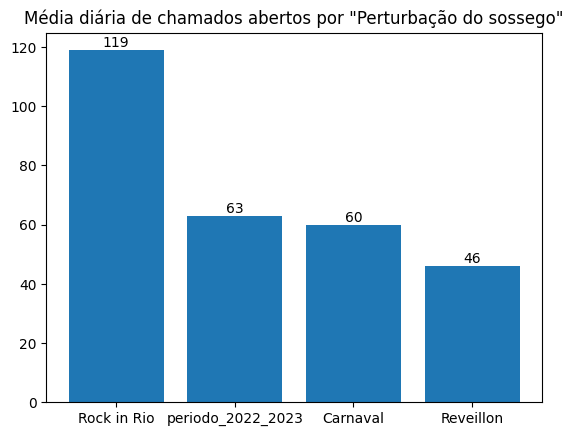

In [66]:
sql = '''
      (SELECT evento, ROUND(AVG(qtd_chamados_abertos)) AS media_diaria
      FROM (
            SELECT DATE(c.data_inicio), e.evento, Count(*) AS qtd_chamados_abertos
            FROM `datario.administracao_servicos_publicos.chamado_1746` c
            JOIN `datario.turismo_fluxo_visitantes.rede_hoteleira_ocupacao_eventos` e
            ON DATE(c.data_inicio) BETWEEN e.data_inicial AND e.data_final
            WHERE data_particao BETWEEN "2022-01-01" AND "2023-12-01"
                AND subtipo = "Perturbação do sossego"
            GROUP BY e.evento, DATE(c.data_inicio)
          )
      GROUP BY evento
      )
      UNION ALL
      (SELECT "periodo_2022_2023" AS evento,ROUND(AVG(qtd_chamados_abertos)) AS media_diaria
      FROM (
        SELECT DATE(data_inicio) AS data_chamado, Count(*) AS qtd_chamados_abertos
        FROM `datario.administracao_servicos_publicos.chamado_1746`
        WHERE data_particao BETWEEN "2022-01-01" AND "2023-12-01"
            AND subtipo = "Perturbação do sossego"
        GROUP BY DATE(data_inicio)
      ))
      ORDER BY 2 DESC;
'''

df = bd.read_sql(sql,billing_project_id=project_id)

print("\n Após realizar um comparativo entre a média diária de chamados abertos entre os eventos e \
e periodo de 2022|2023.\nChegou-se a conclusão de que a média diária de chamados abertos do periodo é maior que a \
do Carnaval e Reveillon, mas não é maior do que o Rock in Rio'.\n")

fig, ax = plt.subplots()
bar_container = ax.bar(df['evento'],df['media_diaria'])
ax.set(title='Média diária de chamados abertos por "Perturbação do sossego"')
ax.bar_label(bar_container)
plt.show()

*by Vitor Santos Lopes*

